In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [3]:
condition_x= pd.read_csv('coursework_1_data_2019_withoutgender.csv')

In [4]:
condition_x_drop=condition_x.drop(['local_authority_area','2008_cases_total','2013_cases_total','2018_cases_total','2008_pop_total',
                                  '2013_pop_total','2018_pop_total','total_budget','2008_proportion','2013_proportion','2018_proportion'], axis=1)
condition_x_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clean_air             152 non-null    int64  
 1   clean_environ         152 non-null    int64  
 2   health_training       152 non-null    int64  
 3   school_awareness      152 non-null    int64  
 4   media_awareness       152 non-null    int64  
 5   sub_counselling       152 non-null    int64  
 6   region                152 non-null    object 
 7   local_authority_type  152 non-null    object 
 8   Unnamed: 16           0 non-null      float64
 9   case_gap              152 non-null    float64
 10  clean_air_proportion  152 non-null    float64
 11  clean_env_proportion  152 non-null    float64
 12  health_proportion     152 non-null    float64
 13  school_proportion     152 non-null    float64
 14  media_proportion      152 non-null    float64
 15  sub_proportion        1

In [5]:
condition_x=condition_x_drop.drop(['case_gap','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 16','local_authority_type','region'],axis =1)
condition_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clean_air             152 non-null    int64  
 1   clean_environ         152 non-null    int64  
 2   health_training       152 non-null    int64  
 3   school_awareness      152 non-null    int64  
 4   media_awareness       152 non-null    int64  
 5   sub_counselling       152 non-null    int64  
 6   clean_air_proportion  152 non-null    float64
 7   clean_env_proportion  152 non-null    float64
 8   health_proportion     152 non-null    float64
 9   school_proportion     152 non-null    float64
 10  media_proportion      152 non-null    float64
 11  sub_proportion        152 non-null    float64
 12  case_mean             152 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 15.6 KB


In [6]:
condition_x=condition_x.drop(['clean_air_proportion','clean_env_proportion','health_proportion','school_proportion','media_proportion','sub_proportion'],axis=1)
condition_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clean_air         152 non-null    int64  
 1   clean_environ     152 non-null    int64  
 2   health_training   152 non-null    int64  
 3   school_awareness  152 non-null    int64  
 4   media_awareness   152 non-null    int64  
 5   sub_counselling   152 non-null    int64  
 6   case_mean         152 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 8.4 KB


In [7]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [8]:
df_predictors_selected_VIF = drop_column_using_vif_(condition_x.drop('case_mean', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling'],
      dtype='object')


In [9]:
model_condition_x = sm.OLS(endog=condition_x[['case_mean']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_condition_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              case_mean   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     48.27
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           3.36e-32
Time:                        02:53:39   Log-Likelihood:                -1181.0
No. Observations:                 152   AIC:                             2376.
Df Residuals:                     145   BIC:                             2397.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              164.4282     78.115      2.105      0.037      10.037     318.820
clean_air            0.0063      0.002      3.908      0.000       0.003       0.009
clean_environ        0.0039      0.001      3.016      0.003       0.001       0.006
health_training      0.0078      0.003      2.349      0.020       0.001       0.014
school_awareness     0.0002      0.001      0.139      0.889      -0.003       0.003
media_awareness     -0.0010      0.003     -0.369      0.713      -0.006       0.004
sub_counselling      0.0089      0.004      1.977      0.050    3.17e-06       0.018
==============================================================================
Omnibus:                       77.042   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.876
Skew:                           1.795   Prob(JB):                     2.43e-87
Kurtosis:                      10.078   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
d2 = pd.read_csv('coursework_1_data_2019.csv')

In [34]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_area  152 non-null    object 
 1   2008_cases_total      152 non-null    int64  
 2   2013_cases_total      152 non-null    int64  
 3   2018_cases_total      152 non-null    int64  
 4   2008_pop_total        152 non-null    int64  
 5   2013_pop_total        152 non-null    int64  
 6   2018_pop_total        152 non-null    int64  
 7   2008_cases_male       152 non-null    int64  
 8   2013_cases_male       152 non-null    int64  
 9   2018_cases_male       152 non-null    int64  
 10  2008_pop_male         152 non-null    int64  
 11  2013_pop_male         152 non-null    int64  
 12  2018_pop_male         152 non-null    int64  
 13  2008_cases_female     152 non-null    int64  
 14  2013_cases_female     152 non-null    int64  
 15  2018_cases_female     1

In [26]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_area  152 non-null    object 
 1   2008_cases_total      152 non-null    int64  
 2   2013_cases_total      152 non-null    int64  
 3   2018_cases_total      152 non-null    int64  
 4   2008_pop_total        152 non-null    int64  
 5   2013_pop_total        152 non-null    int64  
 6   2018_pop_total        152 non-null    int64  
 7   2008_cases_male       152 non-null    int64  
 8   2013_cases_male       152 non-null    int64  
 9   2018_cases_male       152 non-null    int64  
 10  2008_pop_male         152 non-null    int64  
 11  2013_pop_male         152 non-null    int64  
 12  2018_pop_male         152 non-null    int64  
 13  2008_cases_female     152 non-null    int64  
 14  2013_cases_female     152 non-null    int64  
 15  2018_cases_female     1

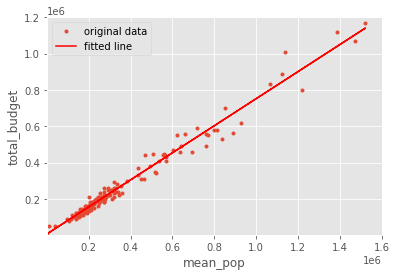

y = 0.747 x + 5612.601
Rsq =  0.9751888323105004
p-value =  2.6127261256900693e-122


In [35]:
X = d2['mean_pop']
Y = d2['total_budget']

plt.xlabel('mean_pop')
plt.ylabel('total_budget')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(2000,1600000)
plt.ylim(1500,1200000)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

simple_regression_model_2 = smf.ols(formula='mean_pop ~ total_budget',data=d2).fit()
print(simple_regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               mean_pop   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     5896.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):          2.61e-122
Time:                        10:52:17   Log-Likelihood:                -1839.8
No. Observations:                 152   AIC:                             3684.
Df Residuals:                     150   BIC:                             3690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1465.2670   5819.828      0.252   

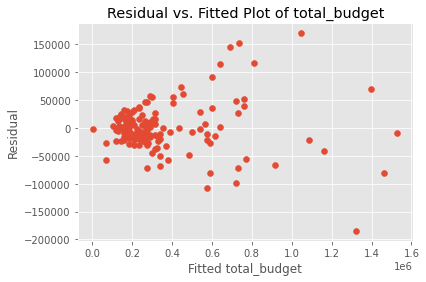

In [39]:
plt.scatter(simple_regression_model_2.fittedvalues, simple_regression_model_2.resid)
# adding title and labels
plt.xlabel('Fitted total_budget')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of total_budget')
plt.show()

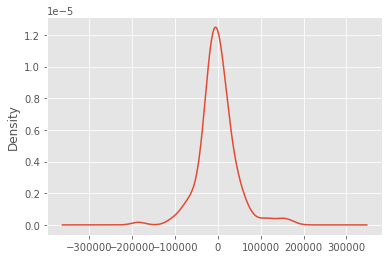

In [40]:
plt.figure()
#ols.fit().model is a method to access to the residual.
simple_regression_model_2.resid.plot.density()
plt.show()